# Introduction to seaborn

========

##### Version 0.15

Data sets have become so large that it is often difficult to communicate the most important findings from your work. This is especially true in the data exploration phase. There are many tools available designed for data exploration - here, we focus on the `python` package `seaborn`.

***
By AA Miller (c) 31 Aug 2017

Updated (ever so slightly) by AM Geller 26 Aug 2020


### Seaborn

[`seaborn`](https://stanford.edu/~mwaskom/software/seaborn/index.html) is a plotting package that readily enables a lot of features that are useful for exploration. It is a python package that has been developed expressly for data visualization. We will now explore a bit of the power of this package. 

*Aside - aesthetics vary greatly from person to person. Some really like the look of seaborn plots; others do not. I've heard it said that `seaborn` is no good as it forces an `import MakeUgly` under the hood. The choice is up to you.*

To begin, we will make a "base" plot of a simple sine curve using [`matplotlib`](https://matplotlib.org).

(0.0, 18.84955592153876)

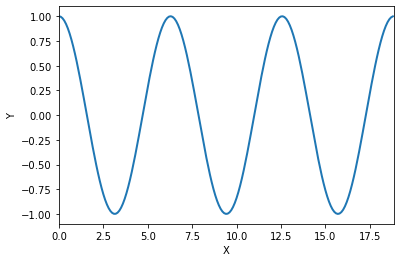

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0, 6*np.pi, 0.1)
y = np.cos(x)

f, ax = plt.subplots()

ax.plot(x,y, lw = 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0, 6*np.pi)

Now we will recreate that same plot using `seaborn`.

(0.0, 18.84955592153876)

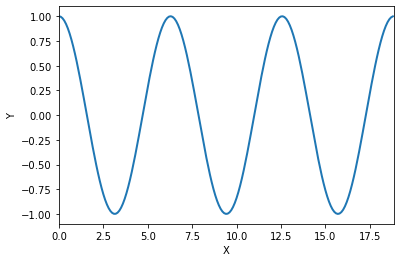

In [2]:
import seaborn as sns

x = np.arange(0, 6*np.pi, 0.1)
y = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x,y, lw = 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0, 6*np.pi)

The current version of seaborn produces the same plot as matplotlibe.  (In the past, it would automatically change the look.)  With seaborn, you can choose to significantly change the styles. 

`seaborn` has 5 style presets: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. You can change the preset using the following: 

    sns.set_style("whitegrid")
which will change the output for all subsequent plots. Note - if you want to change the style for only a single plot, that can be accomplished with the following: 

    with sns.axes_style("dark"):
with all ploting commands inside the `with` statement. 

I encourage you to re-plot the sine curve using each `seaborn` preset to see which you like best. That being said, I will now adopt the `ticks` style as that is the most appropriate for publications.

(0.0, 18.84955592153876)

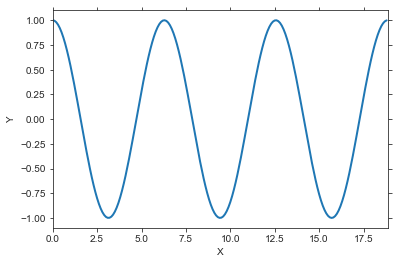

In [3]:
sns.set_style("ticks")

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x,y, lw = 2)
ax.tick_params(top=True, right=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0, 6*np.pi)

The folks behind `seaborn` have thought a lot about color palettes, which is a good thing. Remember - the choice of color for plots is one of the most essential aspects of visualization. A poor choice of colors can easily mask interesting patterns or suggest structure that is not real. To learn more about what is available, see the [`seaborn` color tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html). 

Here we load the default:

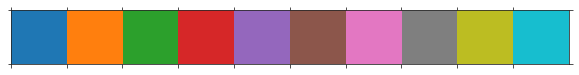

In [4]:
# default color palette

current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.tick_params(top=True, right=True)

which we will now change to `colorblind`, which is clearer to those that are colorblind.

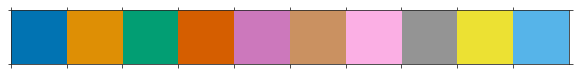

In [5]:
# set palette to colorblind
sns.set_palette("colorblind")

current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.tick_params(top=True, right=True)

Now that we have covered the basics of `seaborn` (and the above examples truly only scratch the surface of what is possible), we will explore the power of `seaborn` for high dimensional data sets. We will load the famous Iris data set, which measures 4 different features of 3 different types of Iris flowers. There are 150 different flowers in the data set.

*Note - for those familiar with `pandas` `seaborn` is designed to integrate easily and directly with `pandas DataFrame` objects. In the example below the Iris data are loaded into a `DataFrame`. `iPython` notebooks also display the `DataFrame` data in a nice readable format.* 

In [6]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Now that we have a sense of the data structure, it is useful to examine the distribution of features. In matplotlib, one needs to go to great pains to produce histograms, KDEs, and rug plots. `seaborn` handles all of that effortlessly with the `distplot` function.

For example - with the following, we can plot the distribution of petal lengths for the Iris data set. 

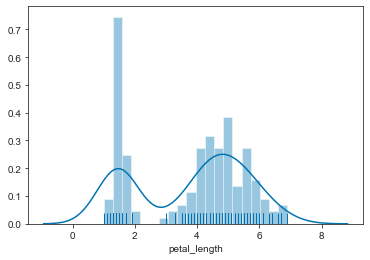

In [7]:
# note - by default hist and kde are set to True, rug is set to False
f,ax = plt.subplots()
with sns.axes_style("darkgrid"):
    sns.distplot(iris['petal_length'], bins=20, hist=True, kde=True, rug=True)

Of course, this data set lives in a 4D space, so plotting more than univariate distributions is important. Fortunately, `seaborn` makes it very easy to produce handy summary plots. 

In matplotlib it is fairly straightforward to create a simple scatter plot. Here is an example showing the Iris petal length against the Iris petal width.

Text(0, 0.5, 'petal width (cm)')

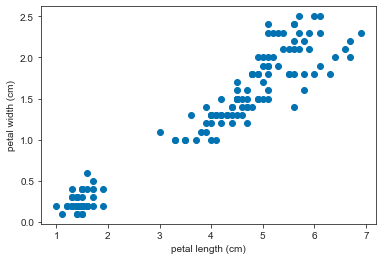

In [8]:
f,ax = plt.subplots()
ax.scatter(iris['petal_length'], iris['petal_width'])
ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")

Of course, when there are many many data points, scatter plots become difficult/impossible to interpret. As in the example below:

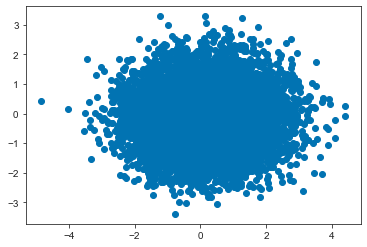

In [9]:
f,ax = plt.subplots()
with sns.axes_style("darkgrid"):
    xexample = np.random.normal(loc = 0.2, scale = 1.1, size = 10000)
    yexample = np.random.normal(loc = -0.1, scale = 0.9, size = 10000)

    ax.scatter(xexample, yexample)

Here, we see that there are many points, clustered about the origin, but we have no sense of the underlying density of the distribution. 2D histograms, such as [`plt.hist2d()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist2d.html?highlight=matplotlib%20axes%20axes%20hist2d#matplotlib.axes.Axes.hist2d), can alleviate this problem. I prefer to use [`hexbin`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hexbin.html?highlight=matplotlib%20axes%20axes%20hexbin#matplotlib.axes.Axes.hexbin) which is a little easier on the eyes (though note - these histograms are just as subject to the same issues discussed above). 

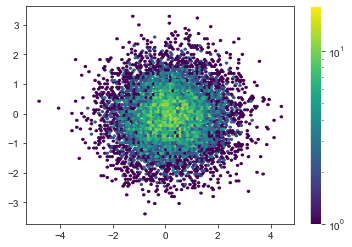

In [10]:
# hexbin w/ bins = "log" returns the log_10 of counts/bin
# mincnt = 1 displays only hexpix with at least 1 source present
f,ax = plt.subplots()
with sns.axes_style("darkgrid"):
    im = ax.hexbin(xexample, yexample, bins = "log", cmap = "viridis", mincnt = 1)
    f.colorbar(im, ax=ax)

While the above plot provides a significant improvement over the scatter plot by providing a better sense of the density near the center of the distribution, the binedge effects are clearly present. An even better solution is a density estimate, which is easily built into `seaborn` via the `kdeplot` function.

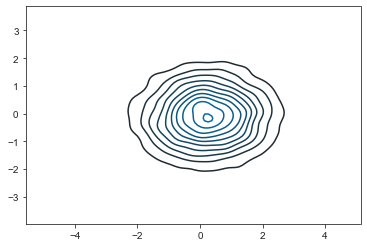

In [11]:
f,ax = plt.subplots()
with sns.axes_style("darkgrid"):
    sns.kdeplot(xexample, yexample,shade=False)

This plot is much more appealing (and informative) than the previous two. For the first time we can clearly see that the distribution is not actually centered on the origin. Now we will move back to the Iris data set. 

Suppose we want to see univariate distributions in addition to the scatter plot? This is certainly possible with `matplotlib` and you can find examples on the web, however, with `seaborn` this is really easy.

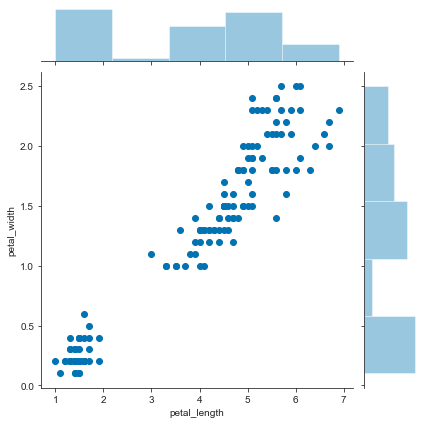

In [12]:
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'])

But! Histograms are evil - and filled with lies to their core. Also - scatter plots can be problematic, as we demonstrated above. 

We can re-create the plot above but set `kind='kde'` to produce *nice looking* density estimates of the distributions.

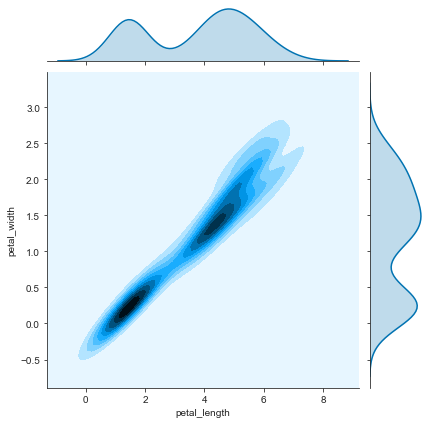

In [13]:
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'], kind = 'kde', shade = 'False')

That is much nicer than what was presented above. (And a lot easier than creating something similar in `matplotlib.pyplot`.)

But honestly, 2D is for little, tiny, baby data sets. You are learning to be data scientists, and data science does not live in 2 dimensions!

Our Iris data has 4D, but we are (mostly) limited to 2D projections of that data. One way around this is via the `seaborn` version of a `pairplot`, which plots the distribution of every variable in the data set against each other. (Here is where the integration with `pandas DataFrame`s becomes so powerful.)

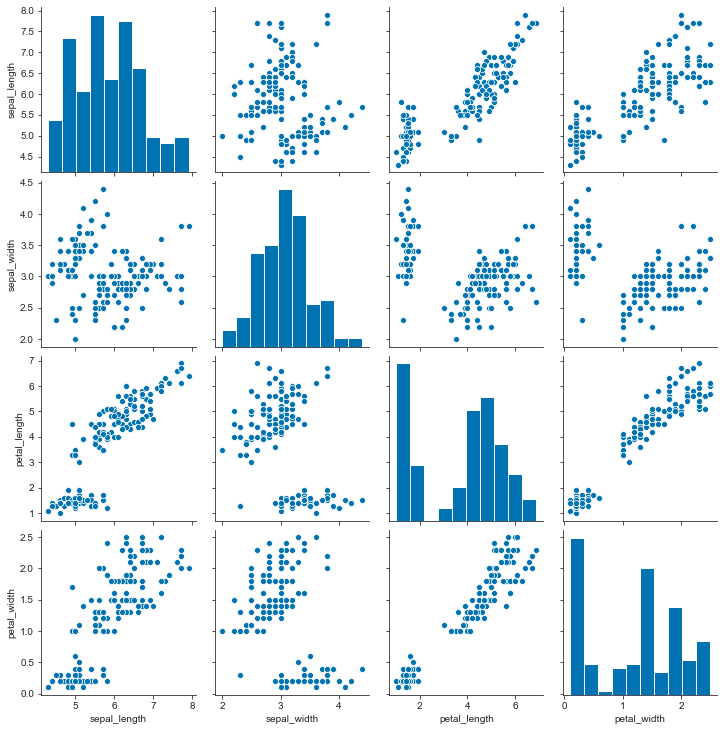

In [14]:
%matplotlib inline    
# necessary to prevent plot from jumping off the page

sns.pairplot(iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]])

For data sets where we have classification labels, we can even color the various points using the `hue` option, and produce KDEs along the diagonal with `diag_type = 'kde'`.

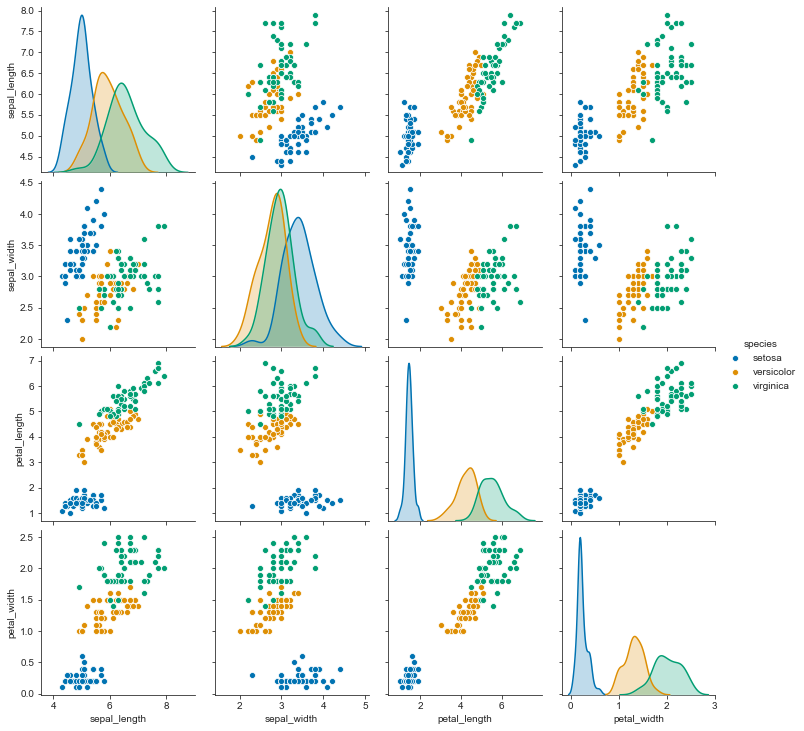

In [15]:
sns.pairplot(iris, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
             hue = "species", diag_kind = 'kde')

Even better - there is an option to create a `PairGrid` which allows fine tuned control of the data as displayed above, below, and along the diagonal. In this way it becomes possible to avoid having symmetric redundancy, which is not all that informative. In the example below, we will show scatter plots and contour plots simultaneously. 

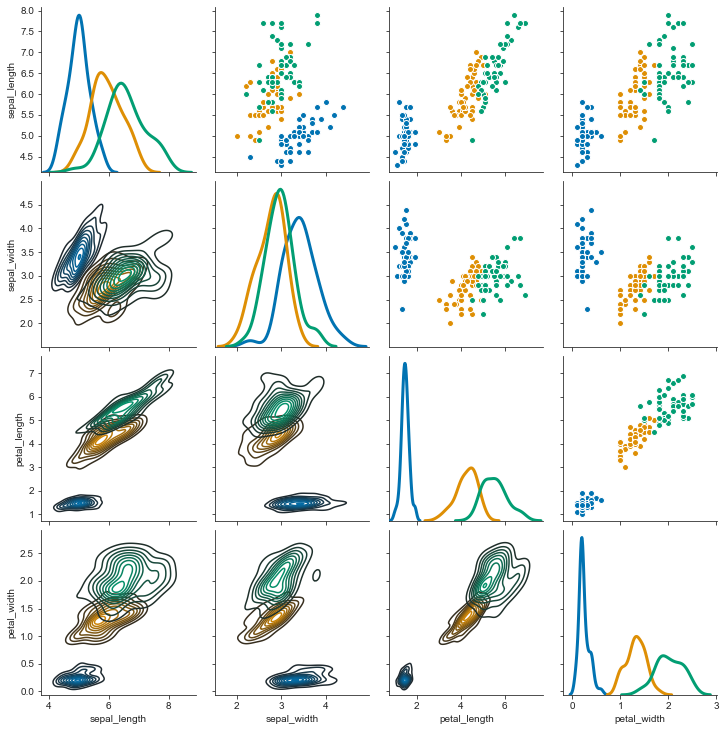

In [16]:
g = sns.PairGrid(iris, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"],
                 hue = "species", diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter, edgecolor='white')
g.map_diag(sns.kdeplot, lw=3)

Thus concludes our brief introduction to `seaborn`. There is so much more that you can do relative to what was shown here. As with any new tool you learn about, remember - before putting that tool into practice [READ THE DOCS](https://seaborn.pydata.org/examples/index.html)!